In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from scipy import stats
import statsmodels.formula.api as smf
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
first_csv = pd.read_csv("test.csv")
second_csv = pd.read_csv("train.csv")

In [19]:
satisfaction = pd.concat([first_csv, second_csv])

In [10]:
satisfaction.to_csv('flight_satisfaction.csv')

In [32]:
predictors = satisfaction.iloc[:, 1:8]
predictors.reset_index()

,index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182
...,...,...,...,...,...,...,...,...
129875,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192
129876,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347
129877,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995
129878,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000


In [21]:
df = pd.read_csv('cleaned.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,satisfied
...,...,...,...,...,...,...,...,...
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,neutral or dissatisfied
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,satisfied
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,neutral or dissatisfied
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,neutral or dissatisfied


In [12]:
df.shape

(129880, 8)

In [14]:
df.describe()

,id,Age,Flight Distance
count,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392
std,37493.270818,15.119360,997.452477
min,1.000000,7.000000,31.000000
25%,32470.750000,27.000000,414.000000
50%,64940.500000,40.000000,844.000000
75%,97410.250000,51.000000,1744.000000
max,129880.000000,85.000000,4983.000000


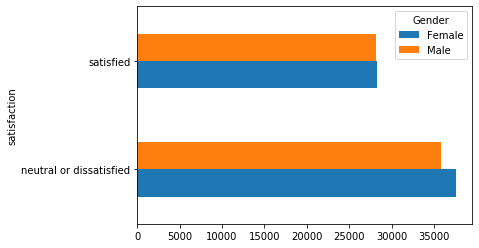

In [43]:
df.pivot_table(index = 'satisfaction', columns = ['Gender'], values = 'id', aggfunc = 'count').plot(kind = 'barh')

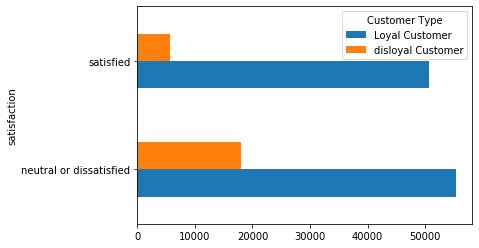

In [44]:
df.pivot_table(index = 'satisfaction', columns = ['Customer Type'], values = 'id', aggfunc = 'count').plot(kind = 'barh')

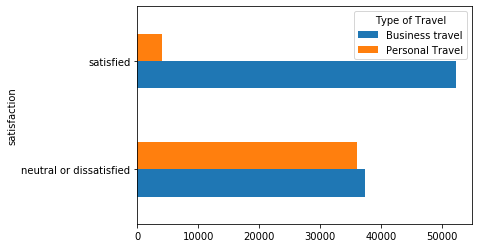

In [50]:
df.pivot_table(index = 'satisfaction', columns = ['Type of Travel'], values = 'id', aggfunc = 'count').plot(kind = 'barh')

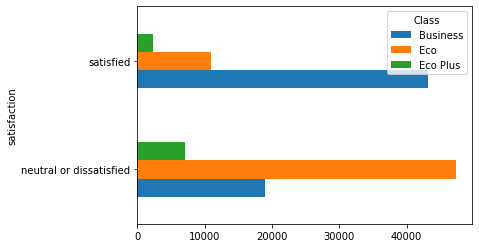

In [51]:
df.pivot_table(index = 'satisfaction', columns = ['Class'], values = 'id', aggfunc = 'count').plot(kind = 'barh')

In [75]:
new_df = df.copy()

In [73]:
def create_ordinal(df):
    """
    create_ordinal takes in diamonds and returns a dataframe of ordinal
    features with names ordinal_<col> where <col> is the original
    categorical column name.

    :Example:
    >>> diamonds = sns.load_dataset('diamonds')
    >>> out = create_ordinal(diamonds)
    >>> set(out.columns) == {'ordinal_cut', 'ordinal_clarity', 'ordinal_color'}
    True
    >>> np.unique(out['ordinal_cut']).tolist() == [0, 1, 2, 3, 4]
    True
    """
    new_df = df.copy()
    gender_unique = 'Female Male'.split(' ')
    customer_unique = 'Loyal Customer, disloyal Customer'.split(', ')
    travel_unique = 'Business travel, Personal Travel'.split(', ')
    class_unique = 'Business, Eco, Eco Plus'.split(', ')
    satisfaction_unique = 'neutral or dissatisfied, satisfied'.split(', ')
    
    
    gender_enc = {y:x for (x,y) in enumerate(gender_unique)}
    customer_enc = {y:x for (x,y) in enumerate(customer_unique)}
    travel_enc = {y:x for (x,y) in enumerate(travel_unique)}
    class_enc = {y:x for (x,y) in enumerate(class_unique)}
    satisfaction_enc = {y:x for (x,y) in enumerate(satisfaction_unique)}
    
    
    
    new_df['gender_enc'] = new_df['Gender'].replace(gender_enc)
    new_df['customer_enc'] = new_df['Customer Type'].replace(customer_enc)
    new_df['travel_enc'] =  new_df['Type of Travel'].replace(travel_enc)
    new_df['class_enc'] =  new_df['Class'].replace(class_enc)
    new_df['satisfaction_enc'] =  new_df['satisfaction'].replace(satisfaction_enc)
    return new_df[['gender_enc', 'customer_enc', 'travel_enc', 'class_enc', 'Age', 'Flight Distance', 'satisfaction_enc']]

In [137]:
ordinal_df = create_ordinal(new_df)
ordinal_df['flight_distance'] = ordinal_df['Flight Distance']
flight_mean = ordinal_df['flight_distance'].mean()
flight_std = ordinal_df['flight_distance'].std()
age_mean = ordinal_df['Age'].mean()
age_std = ordinal_df['Age'].std()
ordinal_df['flight_distance'] = ordinal_df['flight_distance'].apply(lambda x: (x - flight_mean)/ flight_std)
ordinal_df['Age'] = ordinal_df['Age'].apply(lambda x: (x -age_mean) / age_std)
ordinal_df

,gender_enc,customer_enc,travel_enc,class_enc,Age,Flight Distance,satisfaction_enc,flight_distance
0,0,0,0,1,0.831520,160,1,-1.032948
1,0,0,0,0,-0.226726,2863,1,1.676956
2,1,1,0,1,-1.284972,192,0,-1.000866
3,1,0,0,0,0.302397,3377,1,2.192268
4,0,0,0,1,0.633098,1182,1,-0.008338
...,...,...,...,...,...,...,...,...
129875,0,1,0,1,-1.086551,192,0,-1.000866
129876,1,0,0,0,0.633098,2347,1,1.159638
129877,1,1,0,0,-0.623568,1995,0,0.806739
129878,0,1,0,1,-1.152691,1000,0,-0.190802


In [132]:
ordinal_df['class_enc'].value_counts()

0    62160
1    58309
2     9411
Name: class_enc, dtype: int64

In [142]:
logistic_regression = logit('satisfaction_enc ~ travel_enc', data=ordinal_df).fit()
print(logistic_regression.summary())
logistic_regression.pvalues

Optimization terminated successfully.
         Current function value: 0.570433
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       satisfaction_enc   No. Observations:               129880
Model:                          Logit   Df Residuals:                   129878
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                  0.1667
Time:                        01:01:47   Log-Likelihood:                -74088.
converged:                       True   LL-Null:                       -88907.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3381      0.007     49.911      0.000       0.325       0.351
travel_enc    -2.5207      0.

Intercept     0.0
travel_enc    0.0
dtype: float64

Intercept    0.0
class_enc    0.0
dtype: float64